# If we apply mean reversion to a stock calculate the return withcount commision. 
# Steps. 

- Get Data - Done
- Calculate the RSI - Done
- Calculate BB 
- Try follwing. 
- Buy RSI is < 20 and BB is 2 SD lower. (first)
- Buy RSI is < 20 and BB is 2 SD lower. (Second attempt)
- mean ROI updated mean or it can be middle SD rolling mean
- Include Volume
- Volatility
- - Cummulative return vs nifty 50


In [234]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [235]:
ticker = 'RELIANCE.NS'
download_data = yf.download(tickers=ticker, period='2y', interval = '1d')

[*********************100%%**********************]  1 of 1 completed


In [236]:
# download_data

In [237]:
df = download_data['Close']
data = pd.DataFrame(df)
# data

In [238]:
def calculate_rsi(data, window=14):
    # Calculate the price differences
    delta = data.diff()

    # Separate the gains and losses
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)

    # Calculate the rolling averages of gains and losses
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    # Calculate RS (Relative Strength)
    rs = avg_gain / avg_loss

    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

In [245]:
calculate_rsi(data).values

array([[         nan],
       [100.        ],
       [ 96.5919874 ],
       [ 97.11689365],
       [ 69.79289258],
       [ 75.13474753],
       [ 50.24005792],
       [ 47.02242524],
       [ 51.44178711],
       [ 47.5600542 ],
       [ 39.12274686],
       [ 43.82000453],
       [ 41.16446371],
       [ 51.03134931],
       [ 54.0561862 ],
       [ 47.80124   ],
       [ 40.88099682],
       [ 35.82973777],
       [ 34.78923956],
       [ 30.98474908],
       [ 32.2488006 ],
       [ 32.26898817],
       [ 29.1915278 ],
       [ 28.74460768],
       [ 43.63330406],
       [ 41.60009957],
       [ 40.49327435],
       [ 27.04815913],
       [ 29.00773116],
       [ 29.31981886],
       [ 32.92199757],
       [ 50.98362413],
       [ 56.07136822],
       [ 56.50246998],
       [ 64.4839119 ],
       [ 63.52331988],
       [ 65.11812998],
       [ 70.02756931],
       [ 64.13976034],
       [ 64.72686937],
       [ 65.08558248],
       [ 77.14500102],
       [ 72.08879545],
       [ 71

In [191]:
def calculate_LR_Graph(df, ax= None):
    y = np.array(data['Close'])
    X = pd.to_datetime(data['Close'].index).map(dt.datetime.toordinal)
    X = np.array(X)
    intercept, slope = np.polynomial.polynomial.polyfit(X, y, deg =1)
    regression_line = (slope * X + intercept)
    
    # Calculate standard deviation
    std_dev = np.std(y - regression_line)
    plus_2_std = regression_line + 2 * std_dev
    minus_2_std = regression_line - 2 * std_dev
    X = pd.to_datetime(data['Close'].index)

    
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=X, y=y, label='Stock Data', alpha=0.5)
    plt.plot(X, regression_line, color='red', label='Linear Regression Line')
    plt.plot(X, plus_2_std, color='blue', linestyle='--', label='+2 Std Dev')
    plt.plot(X, minus_2_std, color='blue', linestyle='--', label='-2 Std Dev') 
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Linear Regression and ±2 Standard Deviations')
    plt.legend()
    plt.grid(True)
    plt.show()

In [204]:
data['RSI'] = calculate_rsi(data['Close'])

In [192]:
def calculate_LR(df, ax= None):
    y = np.array(data['Close'])
    X = pd.to_datetime(data['Close'].index).map(dt.datetime.toordinal)
    X = np.array(X)
    intercept, slope = np.polynomial.polynomial.polyfit(X, y, deg =1)
    regression_line = (slope * X + intercept)
    
    # Calculate standard deviation
    data['STD'] = np.std(y - regression_line)
    data['+2STD'] = regression_line + 2 * data['STD']
    data['-2STD'] = regression_line - 2 * data['STD']
    X = pd.to_datetime(data['Close'].index)
    return data

In [193]:
# Calculate 2 Sigma

def caluclate_2sigma(data, window = 20):
    data['50MA'] = data['Close'].rolling(window=50).mean()
    data['200MA'] = data['Close'].rolling(window=200).mean()
    data['mean'] = data['Close'].rolling(window=window).mean()
    return data

In [195]:
calculate_LR(data['Close'])

,Close,STD,+2STD,-2STD
Date,,,,
2023-02-14,1097.492798,115.156145,1379.009103,918.384523
2023-02-15,1122.344482,115.156145,1379.424974,918.800394
2023-02-16,1121.467651,115.156145,1379.840846,919.216266
2023-02-17,1126.151855,115.156145,1380.256717,919.632137
2023-02-20,1114.245239,115.156145,1381.504332,920.879751
...,...,...,...,...
2025-02-10,1253.650024,115.156145,1681.347628,1220.723047
2025-02-11,1234.849976,115.156145,1681.763499,1221.138919
2025-02-12,1216.550049,115.156145,1682.179371,1221.554790


In [196]:
result = caluclate_2sigma(data)
# result

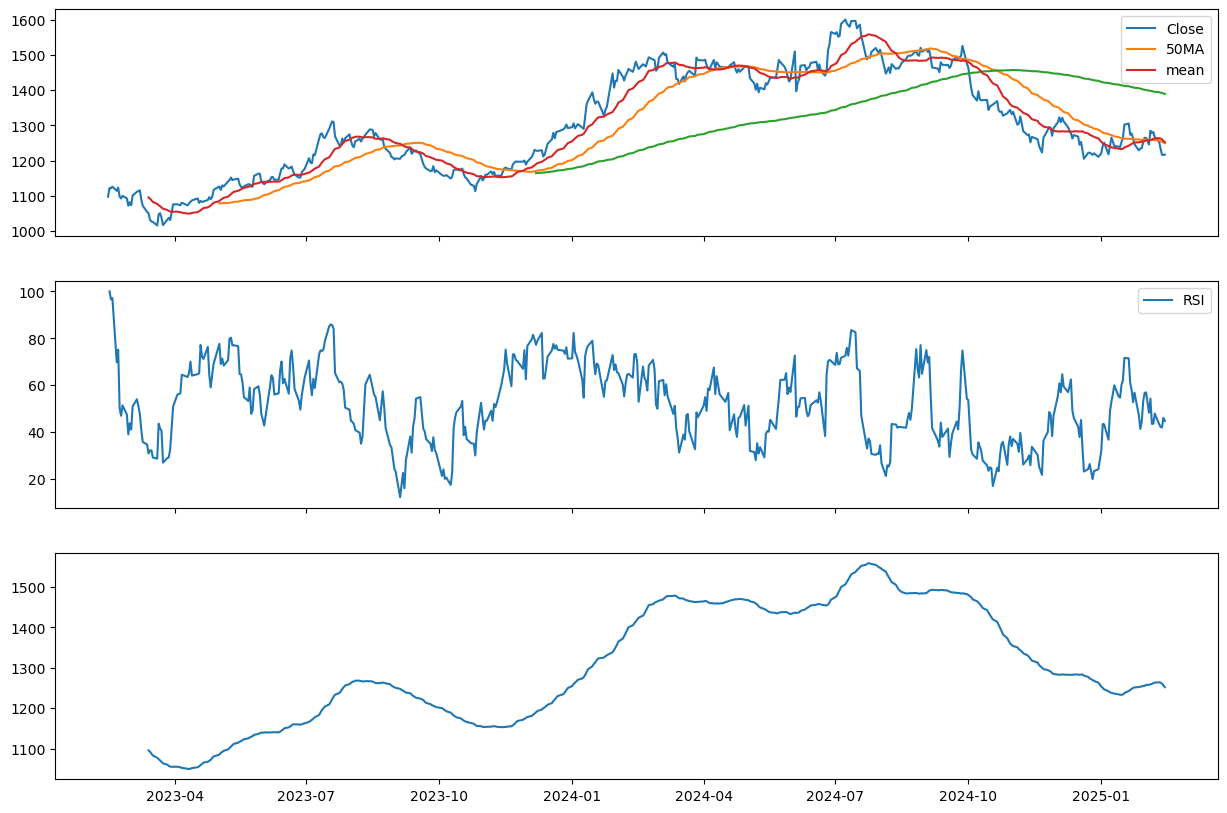

In [200]:
fig, axes = plt.subplots(ncols=1,nrows = 3, sharex=True, figsize = (15,10))


axes[0].plot(data['Close'], label = "Close")
axes[0].plot(data['50MA'], label = '50MA')
axes[0].plot(data['200MA'])
axes[0].plot(data['mean'], label = 'mean');
axes[0].legend()
axes[1].plot(calculate_rsi(data['Close']), label = 'RSI')
axes[1].legend()
axes[2].plot(data['mean']);



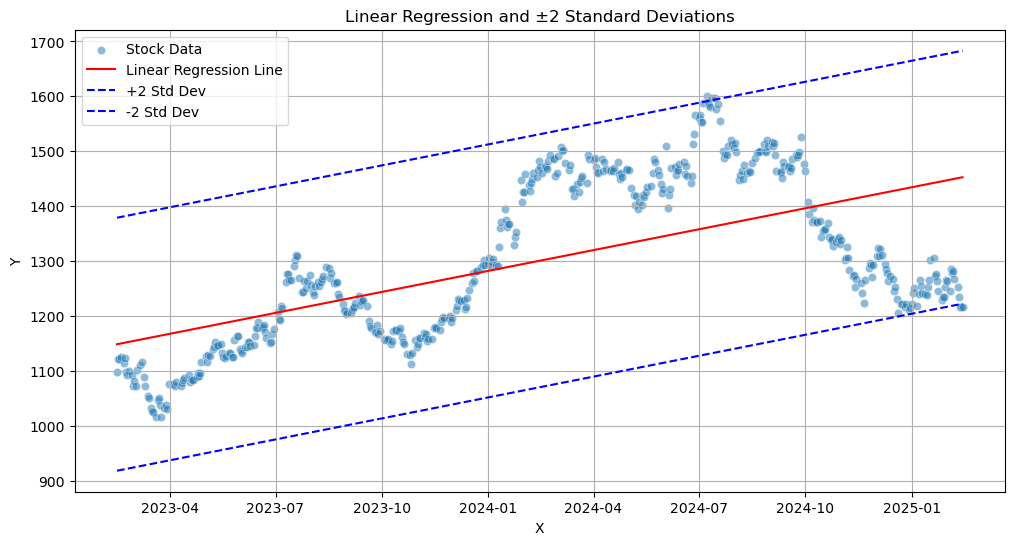

In [201]:
calculate_LR_Graph(data['Close'])

In [211]:
# Buy Signal 

data['Buy'] = np.where((data['RSI']< 20 & data['Close'] < data['-2STD']), 1 ,0)

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

In [207]:
data

,Close,STD,+2STD,-2STD,50MA,200MA,mean,RSI,Buy
Date,,,,,,,,,
2023-02-14,1097.492798,115.156145,1379.009103,918.384523,NaN,NaN,NaN,NaN,0
2023-02-15,1122.344482,115.156145,1379.424974,918.800394,NaN,NaN,NaN,100.000000,0
2023-02-16,1121.467651,115.156145,1379.840846,919.216266,NaN,NaN,NaN,96.591987,0
2023-02-17,1126.151855,115.156145,1380.256717,919.632137,NaN,NaN,NaN,97.116894,0
2023-02-20,1114.245239,115.156145,1381.504332,920.879751,NaN,NaN,NaN,69.792893,0
...,...,...,...,...,...,...,...,...,...
2025-02-10,1253.650024,115.156145,1681.347628,1220.723047,1257.308000,1394.542502,1264.019989,43.495159,0
2025-02-11,1234.849976,115.156145,1681.763499,1221.138919,1255.538999,1393.416877,1263.152490,42.241370,0
2025-02-12,1216.550049,115.156145,1682.179371,1221.554790,1253.691001,1392.236877,1260.657495,42.026269,0


In [233]:
data[(data['RSI']< 30) | (data['Close'] < data['-2STD'])]

,Close,STD,+2STD,-2STD,50MA,200MA,mean,RSI,Buy
Date,,,,,,,,,
2023-03-17,1025.960327,115.156145,1391.901117,931.276537,NaN,NaN,1082.656689,29.191528,0
2023-03-20,1015.876526,115.156145,1393.148731,932.524151,NaN,NaN,1077.142923,28.744608,0
2023-03-24,1016.822571,115.156145,1394.812217,934.187637,NaN,NaN,1063.355615,27.048159,0
2023-03-27,1032.628906,115.156145,1396.059831,935.435251,NaN,NaN,1059.983203,29.007731,0
2023-03-28,1037.451660,115.156145,1396.475703,935.851123,NaN,NaN,1057.217670,29.319819,0
2023-08-30,1209.025024,115.156145,1460.935773,1000.311193,1241.434351,NaN,1253.804999,28.944818,0
2023-08-31,1203.500000,115.156145,1461.351645,1000.727065,1241.902327,NaN,1251.821246,24.542807,0
2023-09-01,1206.324951,115.156145,1461.767516,1001.142936,1242.360344,NaN,1250.239996,23.013665,0
2023-09-04,1205.349976,115.156145,1463.015131,1002.390550,1243.064687,NaN,1247.768744,12.327525,1


In [222]:
data.loc['2025-02-12']

Close    1216.550049
STD       115.156145
+2STD    1682.179371
-2STD    1221.554790
50MA     1253.691001
200MA    1392.236877
mean     1260.657495
RSI        42.026269
Buy         0.000000
Name: 2025-02-12 00:00:00, dtype: float64